## INFSYS 722 - Iteration 4
ID: 168395378
<br/>
Author: Paolo Gabriel Averia Delos Reyes

### 01 - Business Understanding

This section, we describe the business goals and objectives.

Our goal is o study and analyze global water treatment and water consumption. From there, compare the Philippines versus top countries and identify where the Philippines can improve on.

### 02 - Data Understanding

Loading the dataset to grasp what the data looks like.

#### Library imports

In [2]:
# PySpark libraries
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnull, mean
spark = SparkSession.builder.appName('pdel145_iter4').getOrCreate()

# Visualisation
import numpy as np
import matplotlib.pyplot as plt

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/10 22:20:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


#### Loading the datasets

In [3]:
# Freshwater dataset
freshwater_df = spark.read.csv('data/freshwater.csv', inferSchema=True, header=True)

In [4]:
# Checking for its datatypes
freshwater_df.printSchema()

root
 |-- SDG: integer (nullable = true)
 |-- SDG target: double (nullable = true)
 |-- SDG indicator: string (nullable = true)
 |-- Indicator Code: string (nullable = true)
 |-- Indicator name: string (nullable = true)
 |-- Geographical area code: string (nullable = true)
 |-- Geographical area name: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Value: double (nullable = true)
 |-- Time detail: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Footnote: string (nullable = true)
 |-- Type of data: string (nullable = true)
 |-- Units: string (nullable = true)
 |-- Age group: string (nullable = true)
 |-- Bounds: string (nullable = true)
 |-- Frequency: string (nullable = true)
 |-- Level/Status: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Type of reporting: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- SDG 6 Data portal level: string (nullable = true)



In [5]:
# Viewing what the dataset contains
freshwater_df.show(n=5, truncate=False, vertical=True)

-RECORD 0------------------------------------------------------------------------------------------------------------------------------------------------
 SDG                     | 6                                                                                                                             
 SDG target              | 6.4                                                                                                                           
 SDG indicator           | 6.4.2                                                                                                                         
 Indicator Code          | ER_H2O_STRESS                                                                                                                 
 Indicator name          | Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%)                            
 Geographical area code  | Country                                          

In [6]:
# Same goes for the rest of the datasets that are of file format .csv
impr_sanit_df = spark.read.csv('data/improved_sanitation.csv', inferSchema=True, header=True)
renewable_df = spark.read.csv('data/renewable.csv', inferSchema=True, header=True)
safe_manage_drink_df = spark.read.csv('data/safely_managed_drinking.csv', inferSchema=True, header=True)
safe_manage_sanit_df = spark.read.csv('data/safely_managed_sanitation.csv', inferSchema=True, header=True)
tot_popul_df = spark.read.csv('data/total_population.csv', inferSchema=True, header=True)

#### Overview of the dataframes (e.g., summary and nulls)

In [7]:
freshwater_df.summary().show(truncate=False, vertical=True)

-RECORD 0---------------------------------------------------------------------------------------------------------------------------------------------
 summary                 | count                                                                                                                      
 SDG                     | 14465                                                                                                                      
 SDG target              | 14465                                                                                                                      
 SDG indicator           | 14465                                                                                                                      
 Indicator Code          | 14465                                                                                                                      
 Indicator name          | 14465                                                              

In [8]:
impr_sanit_df.summary().show(truncate=False, vertical=True)

-RECORD 0--------------------------------------------------------------------------------------------------------
 summary                 | count                                                                                 
 SDG                     | 0                                                                                     
 SDG target              | 0                                                                                     
 SDG indicator           | 15708                                                                                 
 Indicator Code          | 0                                                                                     
 Indicator name          | 15708                                                                                 
 Geographical area code  | 528                                                                                   
 Geographical area name  | 15708                                                        

In [9]:
renewable_df.summary().show(truncate=False, vertical=True)

-RECORD 0-------------------------------------------------------------------------------------------------------------------------------------
 summary                 | count                                                                                                              
 SDG                     | 34462                                                                                                              
 SDG target              | 34462                                                                                                              
 SDG indicator           | 34462                                                                                                              
 Indicator Code          | 34462                                                                                                              
 Indicator name          | 34462                                                                                                              

In [10]:
safe_manage_drink_df.summary().show(truncate=False, vertical=True)

-RECORD 0-----------------------------------------------------------------------------------------------------------------------
 summary                 | count                                                                                                
 SDG                     | 0                                                                                                    
 SDG target              | 0                                                                                                    
 SDG indicator           | 70686                                                                                                
 Indicator Code          | 0                                                                                                    
 Indicator name          | 70686                                                                                                
 Geographical area code  | 2376                                                                  

In [11]:
safe_manage_sanit_df.summary().show(truncate=False, vertical=True)

-RECORD 0--------------------------------------------------------------------------------------------------------------------
 summary                 | count                                                                                             
 SDG                     | 0                                                                                                 
 SDG target              | 0                                                                                                 
 SDG indicator           | 70686                                                                                             
 Indicator Code          | 0                                                                                                 
 Indicator name          | 70686                                                                                             
 Geographical area code  | 2376                                                                                       

In [12]:
tot_popul_df.summary().show(truncate=False, vertical=True)

-RECORD 0------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 summary                 | count                                                                                                                                                                                                                                                                                                                                                                                                                                                 
 SDG                     | 0                                        

#### Histogram of values per datasets

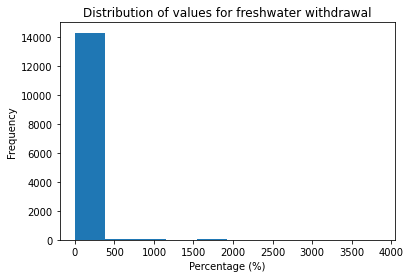

<Figure size 1728x1152 with 0 Axes>

In [13]:
temp = np.array(freshwater_df.select("Value").collect())
temp[temp == None] = 378

plt.hist(temp)
plt.xlabel("Percentage (%)")
plt.ylabel("Frequency")
plt.title("Distribution of values for freshwater withdrawal")
plt.figure(figsize=(24,16))
plt.show()

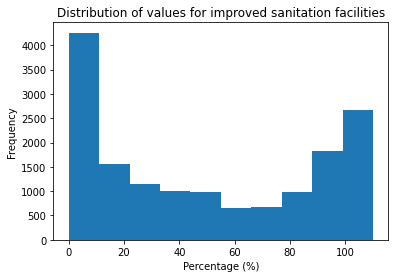

<Figure size 1728x1152 with 0 Axes>

In [14]:
temp = np.array(impr_sanit_df.select("Value").collect())
temp[temp == None] = 110 # range of values are from 0 - 100. Setting it to 110 would allow us to see how distributed values are

plt.hist(temp)
plt.xlabel("Percentage (%)")
plt.ylabel("Frequency")
plt.title("Distribution of values for improved sanitation facilities")
plt.figure(figsize=(24,16))
plt.show()

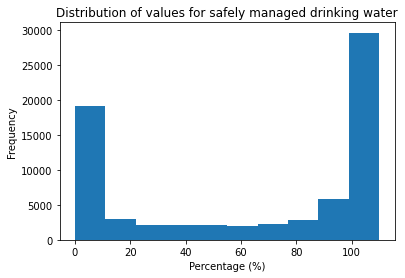

<Figure size 1728x1152 with 0 Axes>

In [15]:
temp = np.array(safe_manage_drink_df.select("Value").collect())
temp[temp == None] = 110 # range of values are from 0 - 100. Setting it to 110 would allow us to see how distributed values are

plt.hist(temp)
plt.xlabel("Percentage (%)")
plt.ylabel("Frequency")
plt.title("Distribution of values for safely managed drinking water")
plt.figure(figsize=(24,16))
plt.show()

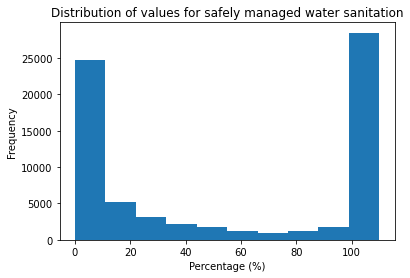

<Figure size 1728x1152 with 0 Axes>

In [16]:
temp = np.array(safe_manage_sanit_df.select("Value").collect())
temp[temp == None] = 110 # range of values are from 0 - 100. Setting it to 110 would allow us to see how distributed values are

plt.hist(temp)
plt.xlabel("Percentage (%)")
plt.ylabel("Frequency")
plt.title("Distribution of values for safely managed water sanitation")
plt.figure(figsize=(24,16))
plt.show()

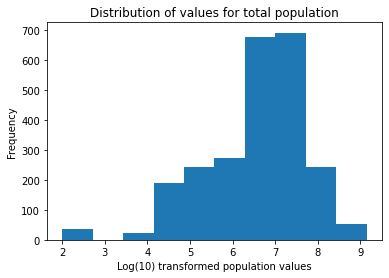

<Figure size 1728x1152 with 0 Axes>

In [17]:
temp = np.array(tot_popul_df.select("Value").collect())
temp[temp == None] = 100 # range of values are from 0 - 100. Setting it to 110 would allow us to see how distributed values are

plt.hist(np.log10(temp.astype(float)))
plt.xlabel("Log(10) transformed population values")
plt.ylabel("Frequency")
plt.title("Distribution of values for total population")
plt.figure(figsize=(24,16))
plt.show()

### 3. Data Preparation
Pre-processing of the data.

In [18]:
# Freshwater: Filter out global data and countries only
freshwater_df_filtered = freshwater_df.filter((freshwater_df['Type of data'] == "Global monitoring data") 
                                              & (freshwater_df['Geographical area code'] == "Country"))

freshwater_df_filtered.show(n = 5, truncate=False, vertical=True)

-RECORD 0------------------------------------------------------------------------------------------------------------------------------------------------
 SDG                     | 6                                                                                                                             
 SDG target              | 6.4                                                                                                                           
 SDG indicator           | 6.4.2                                                                                                                         
 Indicator Code          | ER_H2O_STRESS                                                                                                                 
 Indicator name          | Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%)                            
 Geographical area code  | Country                                          

In [28]:
# Select rows where 'Geographical area code' is null (or not sdg)
impr_sanit_df_filtered = impr_sanit_df.filter(isnull(impr_sanit_df['Geographical area code']))

impr_sanit_df_filtered.show(n=5, truncate=False, vertical=True)

-RECORD 0--------------------------------------------------------------------------------------------------------
 SDG                     | null                                                                                  
 SDG target              | null                                                                                  
 SDG indicator           | 6.1.1                                                                                 
 Indicator Code          | null                                                                                  
 Indicator name          | Drinking water, Piped improved                                                        
 Geographical area code  | null                                                                                  
 Geographical area name  | Uganda                                                                                
 Year                    | 2012                                                         

In [20]:
# Renewable
renewable_df_filtered = renewable_df.filter((renewable_df['Type of data'] == "Global monitoring data") 
                                            | (renewable_df["Type of data"] == "Non-relevant")
                                            & (renewable_df['Geographical area code'] == "Country"))

renewable_df_filtered.show(n = 5, truncate=False, vertical=True)

-RECORD 0------------------------------------------------------------------------------------------------------------
 SDG                     | 6                                                                                         
 SDG target              | 6.4                                                                                       
 SDG indicator           | 6.4.1                                                                                     
 Indicator Code          | ER_H2O_WUEYST                                                                             
 Indicator name          | Water Use Efficiency (United States dollars per cubic meter)                              
 Geographical area code  | Country                                                                                   
 Geographical area name  | United Republic of Tanzania                                                               
 Year                    | 2012                         

In [21]:
# Safely managed drinking water dataset
safe_manage_drink_df_filtered = safe_manage_drink_df.filter((isnull(safe_manage_drink_df["Geographical area code"])) 
                                                     & (safe_manage_drink_df["Location"] == "National"))

safe_manage_drink_df_filtered.show(n = 5, truncate=False, vertical=True)

-RECORD 0-----------------------------------------------------------------------------------------------------------------------------------------------
 SDG                     | null                                                                                                                         
 SDG target              | null                                                                                                                         
 SDG indicator           | 6.1.1                                                                                                                        
 Indicator Code          | null                                                                                                                         
 Indicator name          | Drinking water, At least basic service                                                                                       
 Geographical area code  | null                                                   

In [22]:
# Safely managed sanitation facilities dataset
safe_manage_sanit_df_filtered = safe_manage_sanit_df.filter((isnull(safe_manage_sanit_df["Geographical area code"])) 
                                                     & (safe_manage_sanit_df["Location"] == "National"))

safe_manage_sanit_df_filtered.show(n = 5, truncate=False, vertical=True)

-RECORD 0-------------------------------------------------------------------------------------------------------------------------------------
 SDG                     | null                                                                                                               
 SDG target              | null                                                                                                               
 SDG indicator           | 6.2.1a                                                                                                             
 Indicator Code          | null                                                                                                               
 Indicator name          | Sanitation, At least basic service                                                                                 
 Geographical area code  | null                                                                                                               

In [23]:
# Total population
tot_popul_df_filtered = tot_popul_df.filter(tot_popul_df["Geographical area code"] == "Country")

tot_popul_df_filtered.show(n = 5, truncate=False, vertical=True)

-RECORD 0---------------------------------------
 SDG                     | null                 
 SDG target              | null                 
 SDG indicator           | SP.POP.TOTL          
 Indicator Code          | SP.POP.TOTL          
 Indicator name          | Population           
 Geographical area code  | Country              
 Geographical area name  | Sudan                
 Year                    | 2012                 
 Value                   | 35159792             
 Time detail             | null                 
 Source                  | World Bank           
 Footnote                | null                 
 Type of data            | null                 
 Units                   | Number of people     
 Age group               | null                 
 Bounds                  | null                 
 Frequency               | null                 
 Level/Status            | null                 
 Location                | null                 
 Type of reporting  

#### Restructuring the filtered dataframes to pivot values in indicator as columns.

In [27]:
freshwater_df_filtered = freshwater_df_filtered.groupby("Geographical area name", "Year")\
.pivot("Indicator name").agg(mean("Value"))

freshwater_df_filtered.show(n = 5, vertical = True)

-RECORD 0------------------------------------------------------------------------------------------------------------------
 Geographical area name                                                                             | Antigua and Barbuda  
 Year                                                                                               | 2017                 
 Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) | 4.23                 
-RECORD 1------------------------------------------------------------------------------------------------------------------
 Geographical area name                                                                             | Azerbaijan           
 Year                                                                                               | 2012                 
 Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) | 27.009999999999998   
-RECORD 

In [29]:
impr_sanit_df_filtered = impr_sanit_df_filtered.groupby("Geographical area name", "Year")\
.pivot("Indicator name").agg(mean("Value"))

impr_sanit_df_filtered.show(n = 5, vertical = True)

-RECORD 0------------------------------------------------------
 Geographical area name                 | Guatemala            
 Year                                   | 2018                 
 null                                   | null                 
 Drinking water, Non-piped improved     | 16.755722069822      
 Drinking water, Piped improved         | 77.408896058041      
 Sanitation, Improved latrine and other | 25.116499817496      
 Sanitation, Septic tank                | 9.4860811686276      
 Sanitation, Sewer                      | 43.6284943036        
 Sanitation, Total                      | 78.231075289724      
-RECORD 1------------------------------------------------------
 Geographical area name                 | Madagascar           
 Year                                   | 2018                 
 null                                   | null                 
 Drinking water, Non-piped improved     | 20.337612428654      
 Drinking water, Piped improved         

In [30]:
renewable_df_filtered = renewable_df_filtered.groupby("Geographical area name", "Year")\
.pivot("Indicator name").agg(mean("Value"))

renewable_df_filtered.show(n = 5, vertical = True)

-RECORD 0--------------------------------------------------------------------------
 Geographical area name                                       | Colombia           
 Year                                                         | 2014               
 Groundwater produced internally                              | 510.0              
 Groundwater: entering the country (total)                    | 0.0                
 Overlap: between surface water and groundwater               | 510.0              
 Surface water produced internally                            | 2145.0             
 Surface water: entering the country (total)                  | 215.0              
 Total internal renewable water resources (IRWR)              | 2145.0             
 Total renewable groundwater                                  | 510.0              
 Total renewable surface water                                | 2360.0             
 Total renewable water resources                              | 2360.0      

In [31]:
safe_manage_drink_df_filtered = safe_manage_drink_df_filtered.groupby("Geographical area name", "Year")\
.pivot("Indicator name").agg(mean("Value"))

safe_manage_drink_df_filtered.show(n = 5, vertical = True)

-RECORD 0------------------------------------------------------
 Geographical area name                 | Iran (Islamic Rep... 
 Year                                   | 2016                 
 Drinking water, At least basic service | null                 
 Drinking water, Available              | null                 
 Drinking water, Basic service          | 3.553270578          
 Drinking water, Free of contamination  | 96.29471676          
 Drinking water, Limited                | 1.982387223          
 Drinking water, On premises            | 93.37181289          
 Drinking water, Safely managed service | 93.37181289          
 Drinking water, Surface water          | 0.074873581          
 Drinking water, Unimproved             | 1.01765584           
-RECORD 1------------------------------------------------------
 Geographical area name                 | Greenland            
 Year                                   | 2017                 
 Drinking water, At least basic service 

In [32]:
safe_manage_sanit_df_filtered = safe_manage_sanit_df_filtered.groupby("Geographical area name", "Year")\
.pivot("Indicator name").agg(mean("Value"))

safe_manage_sanit_df_filtered.show(n = 5, vertical = True)

-RECORD 0--------------------------------------------------
 Geographical area name             | Azerbaijan           
 Year                               | 2012                 
 Sanitation, At least basic service | null                 
 Sanitation, Basic service          | 26.4825592           
 Sanitation, Disposed insitu        | 22.40526944          
 Sanitation, Faecal sludge treated  | 20.25774528          
 Sanitation, Limited service        | 3.185506082          
 Sanitation, Open defecation        | 0.176239299          
 Sanitation, Safely managed service | 63.38538526          
 Sanitation, Sewage treated         | 20.515499            
 Sanitation, Unimproved             | 6.770309811          
-RECORD 1--------------------------------------------------
 Geographical area name             | Antigua and Barbuda  
 Year                               | 2017                 
 Sanitation, At least basic service | 97.39399996          
 Sanitation, Basic service          | nu

In [33]:
tot_popul_df_filtered = tot_popul_df_filtered.groupby("Geographical area name", "Year")\
.pivot("Indicator name").agg(mean("Value"))

tot_popul_df_filtered.show(n = 5, vertical = True)

-RECORD 0--------------------------------------
 Geographical area name | Seychelles           
 Year                   | 2022                 
 Population             | 100060.0             
-RECORD 1--------------------------------------
 Geographical area name | Bermuda              
 Year                   | 2018                 
 Population             | 63918.0              
-RECORD 2--------------------------------------
 Geographical area name | Greenland            
 Year                   | 2017                 
 Population             | 56172.0              
-RECORD 3--------------------------------------
 Geographical area name | China, Hong Kong ... 
 Year                   | 2018                 
 Population             | 7452600.0            
-RECORD 4--------------------------------------
 Geographical area name | Colombia             
 Year                   | 2014                 
 Population             | 4.6677947E7          
only showing top 5 rows



#### Merging the restructured dataframes into one merged_df

In [62]:
merged_df = freshwater_df_filtered.join(impr_sanit_df_filtered, on=["Year", "Geographical area name"], how="inner") \
               .join(renewable_df_filtered, on=["Year", "Geographical area name"], how="inner") \
               .join(safe_manage_drink_df_filtered, on=["Year", "Geographical area name"], how="inner") \
               .join(safe_manage_sanit_df_filtered, on=["Year", "Geographical area name"], how="inner") \
               .join(tot_popul_df_filtered, on=["Year", "Geographical area name"], how="inner")

#Dropping null generated columns
merged_df = merged_df.drop("null")
merged_df.show(n = 5, vertical = True)

-RECORD 0-----------------------------------------------------------------------------------------------------------------
 Year                                                                                               | 2018                
 Geographical area name                                                                             | Guatemala           
 Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) | 2.87                
 Drinking water, Non-piped improved                                                                 | 16.755722069822     
 Drinking water, Piped improved                                                                     | 77.408896058041     
 Sanitation, Improved latrine and other                                                             | 25.116499817496     
 Sanitation, Septic tank                                                                            | 9.4860811686276     
 Sanitation, Sew

#### Dealing with the null values/column

New: Setting a threshold of null values allowed per row. Since we have a total of 38 features, we can remove the rows with greater than 10% of the total features (4).

In [63]:
# Dropping the rows with many null values exceeding the threshold
merged_df = merged_df.na.drop(thresh = 4)

# Replacing the null values in Population with a fixed number of people
merged_df = merged_df.na.fill(5000, subset=['Population'])

merged_df.show(n=5, vertical=True)

-RECORD 0-----------------------------------------------------------------------------------------------------------------
 Year                                                                                               | 2018                
 Geographical area name                                                                             | Guatemala           
 Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) | 2.87                
 Drinking water, Non-piped improved                                                                 | 16.755722069822     
 Drinking water, Piped improved                                                                     | 77.408896058041     
 Sanitation, Improved latrine and other                                                             | 25.116499817496     
 Sanitation, Septic tank                                                                            | 9.4860811686276     
 Sanitation, Sew

In [60]:
merged_df.describe().show(vertical=True)

-RECORD 0------------------------------------------------------------------------------------------------------------------
 summary                                                                                            | count                
 Year                                                                                               | 1601                 
 Geographical area name                                                                             | 1601                 
 Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) | 1601                 
 Drinking water, Non-piped improved                                                                 | 1530                 
 Drinking water, Piped improved                                                                     | 1530                 
 Sanitation, Improved latrine and other                                                             | 1574                 
 Sanitat